코드 참고 : https://github.com/minsuk-heo/tf2/blob/master/jupyter_notebooks/04.AutoEncoder.ipynb

In [15]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  %tensorflow_version 2.x
except Exception:
  pass

In [16]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np
from IPython.display import Image
import pandas as pd   
import keras 

# in order to always get the same result
#tf.random.set_seed(1)
#np.random.seed(1)

In [17]:
import os
import cv2


def create_dataset(real_img_path, samples, shuffle=True, train_test_ratio=0.8):
    '''
    returns a list of images and their labels
    '''
    real_imgs = []
    #fake_imgs = []

    for img in os.listdir(real_img_path):
            #print(os.path.join(real_img_path, img))
        real_imgs.append([cv2.resize(cv2.imread(os.path.join(real_img_path, img)), (128, 128)), 1])
        #    print(real_imgs) 
        #except Exception as e:
        #    continue
        #   print(str(e))
        if len(real_imgs) == samples:
            break

    '''
    for img in os.listdir(fake_img_path):
        fake_imgs.append([cv2.imread(os.path.join(fake_img_path, img)), 0])

        if len(fake_imgs) == samples:
            break
    '''
    
    #imgs = real_imgs+fake_imgs
    imgs = np.array(real_imgs)
    
    if shuffle:
        np.random.shuffle(imgs)

    X_train = []
    X_test = []
    Y_train = []
    Y_test = []

    for img, i in zip(imgs, range(len(imgs))):
        if i < int(train_test_ratio*len(imgs)):
            X_train.append(img[0])
            Y_train.append([img[1]])
        else:
            X_test.append(img[0])
            Y_test.append([img[1]])

    X_train = np.array(X_train)
    X_test = np.array(X_test)
    Y_train = np.array(Y_train)
    Y_test = np.array(Y_test)

    return X_train, X_test, Y_train, Y_test


def data_generator(X, Y, batch_size):
    '''
    data generator for training classifier
    '''
    while True:
        for i in range(0, len(X), batch_size):
            X_batch = X[i:i+batch_size, :, :, :]
            Y_batch = Y[i:i+batch_size, :]

            yield X_batch, Y_batch

In [18]:
path = r"D:\Big_Data\img_align_celeba\train"
# 1만개의 샘플
x_train, x_test, y_train, y_test = create_dataset(path, 2000)
print(x_train.shape)
print(x_train.shape[1])

(1600, 128, 128, 3)
128


In [19]:
#(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
# x_train = train_generator
#x_test = img_tensor

In [20]:
# we will use train data for auto encoder training
# 128*128 = 16,384 여기서 채널수 곱한 49,152 로 대입
x_train = x_train.reshape(1600, 49152)

# select 300 test data for visualization
x_test = x_test[:300]
y_test = y_test[:300]
x_test = x_test.reshape(300, 49152)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# normalize data
color_scale = 255
x_train /= color_scale
x_test /= color_scale

In [21]:
# MNIST input 128 rows * 128 columns = 16,384 pixels 채널수 곱하면 49,152
input_img = Input(shape=(49152,))
# encoder
encoder1 = Dense(4096, activation='sigmoid')(input_img)
encoder2 = Dense(256, activation='sigmoid')(encoder1)
# decoder
decoder1 = Dense(4096, activation='sigmoid')(encoder2)
decoder2 = Dense(49152, activation='sigmoid')(decoder1)

# this model maps an input to its reconstruction
autoencoder = Model(inputs=input_img, outputs=decoder2)

In [22]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=600,
                batch_size=30,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/600
54/54 [==============================] - 82s 2s/step - loss: 0.6177 - val_loss: 0.6187
Epoch 2/600
54/54 [==============================] - 81s 1s/step - loss: 0.6213 - val_loss: 0.6214
Epoch 3/600
54/54 [==============================] - 80s 1s/step - loss: 0.6187 - val_loss: 0.6178
Epoch 4/600
54/54 [==============================] - 81s 1s/step - loss: 0.6231 - val_loss: 0.6157
Epoch 5/600
54/54 [==============================] - 81s 2s/step - loss: 0.6205 - val_loss: 0.6184
Epoch 6/600
54/54 [==============================] - 80s 1s/step - loss: 0.6189 - val_loss: 0.6182
Epoch 7/600
54/54 [==============================] - 80s 1s/step - loss: 0.6194 - val_loss: 0.6161
Epoch 8/600
54/54 [==============================] - 80s 1s/step - loss: 0.6176 - val_loss: 0.6163
Epoch 9/600
54/54 [==============================] - 80s 1s/step - loss: 0.6191 - val_loss: 0.6140
Epoch 10/600
54/54 [==============================] - 81s 1s/step - loss: 0.6203 - val_loss: 0.6272
Epoch 11/

54/54 [==============================] - 79s 1s/step - loss: 0.6152 - val_loss: 0.6162
Epoch 84/600
54/54 [==============================] - 78s 1s/step - loss: 0.6159 - val_loss: 0.6156
Epoch 85/600
54/54 [==============================] - 78s 1s/step - loss: 0.6153 - val_loss: 0.6188
Epoch 86/600
54/54 [==============================] - 78s 1s/step - loss: 0.6150 - val_loss: 0.6132
Epoch 87/600
54/54 [==============================] - 78s 1s/step - loss: 0.6149 - val_loss: 0.6150
Epoch 88/600
54/54 [==============================] - 78s 1s/step - loss: 0.6165 - val_loss: 0.6146
Epoch 89/600
54/54 [==============================] - 79s 1s/step - loss: 0.6146 - val_loss: 0.6143
Epoch 90/600
54/54 [==============================] - 79s 1s/step - loss: 0.6157 - val_loss: 0.6178
Epoch 91/600
54/54 [==============================] - 78s 1s/step - loss: 0.6155 - val_loss: 0.6150
Epoch 92/600
54/54 [==============================] - 78s 1s/step - loss: 0.6157 - val_loss: 0.6145
Epoch 93/600


In [24]:
# create encoder model
encoder = Model(inputs=input_img, outputs=encoder2)
# create decoder model
encoded_input = Input(shape=(256,))
decoder_layer1 = autoencoder.layers[-2]
decoder_layer2 = autoencoder.layers[-1]
decoder = Model(inputs=encoded_input, outputs=decoder_layer2(decoder_layer1(encoded_input)))

In [25]:
# get latent vector for visualization
latent_vector = encoder.predict(x_test)
# get decoder output to visualize reconstructed image
reconstructed_imgs = decoder.predict(latent_vector)

C:\Users\player\anaconda3\lib\site-packages\matplotlib\text.py:1163: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


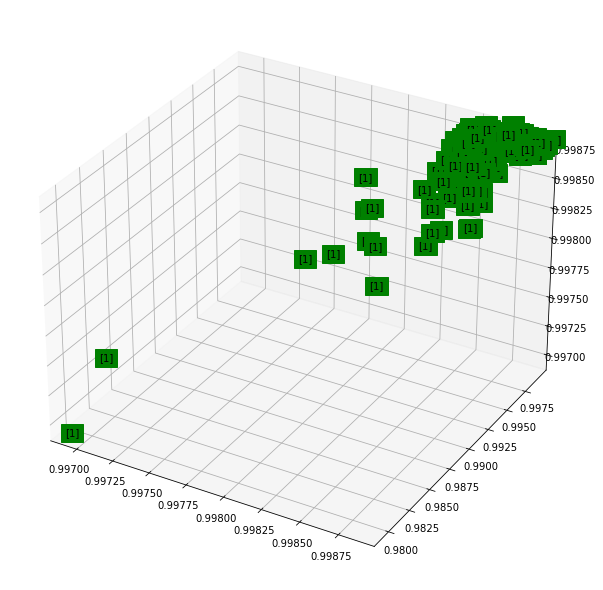

In [26]:
# visualize in 3D plot
from pylab import rcParams
rcParams['figure.figsize'] = 10, 8

fig = plt.figure(1)
ax = Axes3D(fig)

xs = latent_vector[:, 0]
ys = latent_vector[:, 1]
zs = latent_vector[:, 2]

color=['red','green','blue','lime','white','pink','aqua','violet','gold','coral']

for x, y, z, label in zip(xs, ys, zs, y_test):
    c = color[int(label)]
    ax.text(x, y, z, label, backgroundcolor=c)
    
ax.set_xlim(xs.min(), xs.max())
ax.set_ylim(ys.min(), ys.max())
ax.set_zlim(zs.min(), zs.max())

plt.show()

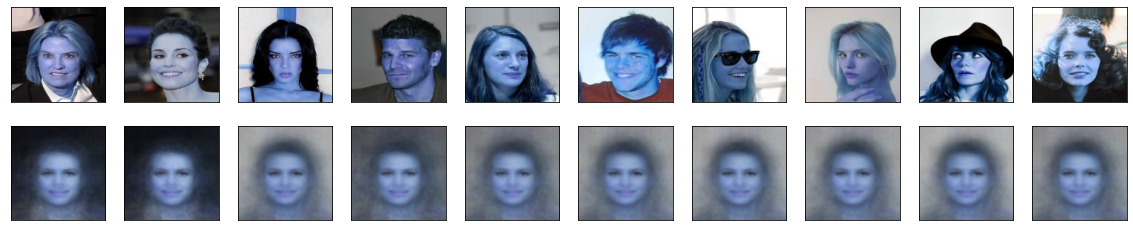

In [30]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(128, 128,3))
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstructed image
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed_imgs[i].reshape(128, 128,3))
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()